In [347]:
# Make imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [348]:
# Load the Data 
heart_disease=pd.read_csv("data/heart_disease.csv")
heart_disease.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [349]:
# split data into features and labels
X=heart_disease.drop("output",axis=1)
y=heart_disease["output"]
X.shape,y.shape

((289, 13), (289,))

In [350]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# `In This Section we will`
* Clean Data
* Transform Data
* Reduce Data (To reduce1 overall cost if less data brings us same results)

In [351]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [352]:
# Feature and label split done 
X=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

In [353]:
# Three splits made 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [354]:
# Lets Try to make a model out of this data
# from sklearn.ensemble import RandomForestRegressor
# model=RandomForestRegressor()
# model.fit(X_train,y_train)
# model.score(X_test,y_test)

`The error above means ML Models can't work with categorical data like string to fix this lets convert our data to > Numerical Data `

In [355]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [356]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']

one_hot = OneHotEncoder()

transformer = ColumnTransformer(
    transformers=[
        ('one_hot', one_hot, categorical_features)
    ],
    remainder='passthrough'
)

transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [357]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

# The other way to do the same is 

In [358]:
dummies=pd.get_dummies(car_sales[["Make","Colour"]])
dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,False,True,False,False,False,False,False,False,True
1,True,False,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,True
4,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,True,True,False,False,False,False
996,False,False,True,False,False,False,False,False,True
997,False,False,True,False,False,True,False,False,False
998,False,True,False,False,False,False,False,False,True


In [359]:
transformed_X.shape,y_train.shape

((1000, 13), (800,))

In [360]:
# Refit the model 
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.11018580786985954

`Now lets handle Missing Data`

To handle Missing data way have two ways:
* Imputation (Filling missing values with some value)
* Removing the values 

In [361]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [362]:
# Find Missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

The Dataset above has a lot of missing data values so lets fix it now

In [363]:
car_sales_missing['Make'].fillna("missing",inplace=True)
car_sales_missing.isna().sum()

Make              0
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [364]:
import warnings
warnings.filterwarnings("ignore")

In [365]:
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [366]:
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors            50
Price            50
dtype: int64

In [367]:
np.round(car_sales_missing["Doors"].mean())

np.float64(4.0)

In [368]:
car_sales_missing["Doors"].fillna(4,inplace=True)
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [369]:
# Drop those rows which have missing labels
car_sales_missing.dropna(inplace=True)

In [370]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [371]:
car_sales_missing.head(2)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0


In [372]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

Convert string or `object data` in features to the `Numerical data`

In [373]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer(
    transformers=[
        ("one_hot",one_hot,categorical_features)
    ],
    remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 4.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.92714e+05, 5.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 4.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 4.00000e+00]], shape=(950, 13))

In [374]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

In [375]:
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [376]:
model.score(X_test,y_test)

0.035591121988667096

# Filling Missing Values with Scikit-learn now

In [377]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
len(car_sales_missing)

1000

In [378]:
# First drop all those rows which have no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
len(car_sales_missing)

950

car_sales_missing.isna().sum()

In [379]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [380]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [381]:
# Creating Imputers 
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")
# Define data
cat_featuers=["Make","Colour"]
door_features=['Doors']
num_features=["Odometer (KM)"]
# Define Pipeline 
imputer= ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_featuers),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])
filled_X_train=imputer.fit_transform(X_train)
filled_X_test=imputer.transform(X_test)

In [382]:
type(filled_X_train)

numpy.ndarray

In [383]:
filled_X_train

array([['Toyota', 'Blue', 4.0, 103202.0],
       ['Nissan', 'White', 4.0, 87997.0],
       ['Honda', 'White', 4.0, 178351.0],
       ...,
       ['missing', 'White', 4.0, 138294.0],
       ['Honda', 'Black', 4.0, 134825.0],
       ['Toyota', 'Green', 4.0, 221725.0]], shape=(760, 4), dtype=object)

In [384]:
# Get our Transformed Data back into DatFrame
car_sales_filled_train=pd.DataFrame(filled_X_train,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled_test=pd.DataFrame(filled_X_test,columns=["Make","Colour","Doors","Odometer (KM)"])
type(car_sales_filled_test),type(car_sales_filled_train)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [385]:
# check data types now 
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [386]:
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [387]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [388]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer(
    transformers=[
        ("one_hot",one_hot,categorical_features)
    ],
    remainder="passthrough")
transformed_X_train=transformer.fit_transform(car_sales_filled_train)
transformed_X_test=transformer.transform(car_sales_filled_test)


In [389]:
# Model Creation 
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

model.fit(transformed_X_train,y_train)
model.score(transformed_X_test,y_test)

0.3598850052841367

Whenever you need to Choose a model goto map provided by Sklearn https://scikit-learn.org/stable/machine_learning_map.html

In [390]:
# Lets work with house pricing 
boston=pd.read_csv("https://raw.githubusercontent.com/FairozAhmadSheikh/Datasets_CSV/refs/heads/main/Boston.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [391]:
boston_df=boston.rename(columns={"MEDV":"target"})
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [392]:
len(boston_df)

506

In [393]:
# go to sklearn documentation and choose a model that fits according to problem 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
# Split in features and target 
X=boston_df.drop("target",axis=1)
y=boston_df["target"]
# Train test split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Model 
model=Ridge()

# Train model 
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.7991878315708332

Above Model has accuracy near to 80% lets see if we can improve by selecting another model 

In [394]:
from sklearn.ensemble import RandomForestRegressor 
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8290656308022537

Moving up a bit so keep experimenting 

### Choosing Estimator for Classification now 

In [395]:
# Heart Disease dataset
heart_disease=pd.read_csv("data/heart_disease.csv").rename(columns={"output":"target"})
heart_disease.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [396]:
len(heart_disease)

289

In [397]:
from sklearn.svm import LinearSVC

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=LinearSVC()

clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.7758620689655172

In [398]:
from sklearn.ensemble import RandomForestClassifier

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)
clf.score(X_test,y_test)



0.7413793103448276

In [399]:
# Two ways of prediction `predict` and `predict_proba` 
y_preds=clf.predict(X_test)
y_preds
y_preds_2=clf.predict_proba(X_test)
y_preds_2[:3]  # Gives probaility of classes i.e % how confident it is 

array([[0.01, 0.99],
       [0.22, 0.78],
       [0.47, 0.53]])

Same can be done  to solve `regresion problems`

In [400]:
from sklearn.ensemble import RandomForestRegressor
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8680943877735202

In [401]:
y_preds=model.predict(X_test)
y_preds[:10]

array([12.755, 20.854, 48.34 , 20.938, 33.557, 43.971, 26.143, 22.629,
       20.884, 22.782])

In [402]:
np.array(y_test[:10])

array([10.2, 21.4, 50. , 21.7, 34.6, 43.5, 27.5, 22.3, 19.6, 22.2])

In [403]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds,y_test)

2.5700686274509796

# Lets Evaluate models using some metrics 

* Score method
* scoring parameter
* Problem Specific Metric 

In [404]:
from sklearn.ensemble import RandomForestClassifier

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [405]:
clf.score(X_test,y_test)

0.8103448275862069

In [406]:
from sklearn.svm import LinearSVC

clf2=LinearSVC()
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

0.8448275862068966

In [407]:
from sklearn.linear_model import SGDClassifier

clf3=SGDClassifier()
clf3.fit(X_train,y_train)
clf3.score(X_test,y_test)

0.41379310344827586

In [408]:
from sklearn.naive_bayes import GaussianNB

nbm=GaussianNB()
nbm.fit(X_train,y_train)
nbm.score(X_test,y_test)

0.8275862068965517

In [409]:
# Score method 
nbm.score(X_test,y_test)

0.8275862068965517

In [410]:
# scorring method 
from sklearn.model_selection import cross_val_score

score=cross_val_score(nbm,X,y,cv=5,scoring=None)

In [411]:
print(f'heart disease cross validated Accuracy : {np.mean(score)*100:.2f} % ')

heart disease cross validated Accuracy : 82.33 % 


# Area Under AUC ROC Curve 

In [412]:
# comparision of True Positive Rate vs False Positive Rate 
from sklearn.metrics import roc_curve
clf=RandomForestClassifier()

clf.fit(X_train,y_train)

y_probs=clf.predict_proba(X_test)

y_prob_positives = y_probs[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_prob_positives)

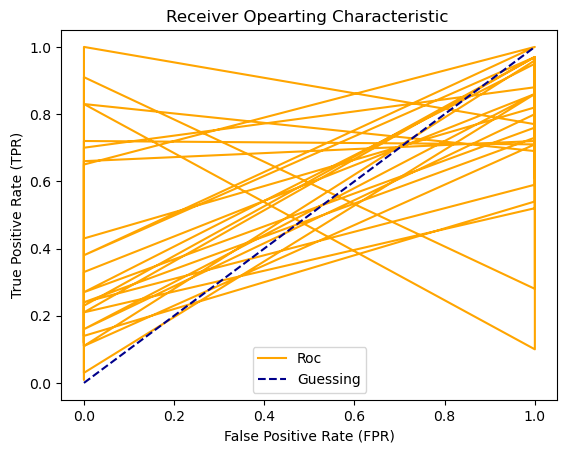

In [413]:
# Functionize 
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='Roc')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')

    plt.title("Receiver Opearting Characteristic ")
    plt.legend()
    plt.show()

plot_roc_curve(y_test,y_prob_positives)

In [414]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_prob_positives)

0.8366459627329191

In [415]:
from sklearn.metrics import confusion_matrix

y_preds=clf3.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[23,  0],
       [34,  1]])

In [416]:
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],
                           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,0
1,34,1


<Axes: >

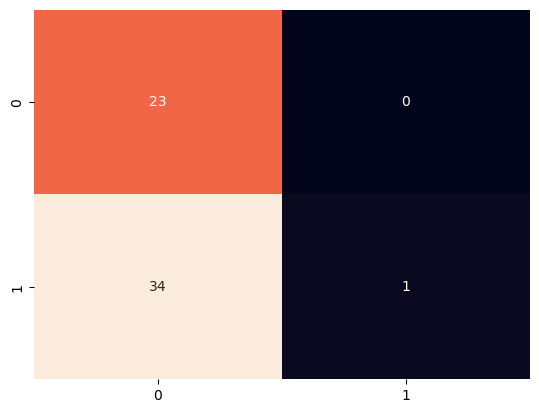

In [417]:
# Plotting Using HeatMaps
import seaborn as sns 
conf_mat=confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat,annot=True,cbar=False)

In [418]:
# Classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57        23
           1       1.00      0.03      0.06        35

    accuracy                           0.41        58
   macro avg       0.70      0.51      0.32        58
weighted avg       0.76      0.41      0.26        58



# Regression Model Evaluation Matrix 

In [419]:
from sklearn.ensemble import RandomForestRegressor 

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test) # Default is R^2

0.8654448653350507

In [420]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(X_test)

mae=mean_absolute_error(y_test,y_preds)

df=pd.DataFrame(data={"actual_value":y_test,
                     "predicted_value":y_preds})
df["difference"]=df["predicted_value"]-df["actual_value"]

In [421]:
df.head()

,actual_value,predicted_value,difference
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793


In [422]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_preds)
mse

9.867437068627442

In [423]:
np.square(df["difference"]).mean()

np.float64(9.867437068627442)

# Scoring Parameter

* For Classification 

In [424]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

cv_acc=cross_val_score(clf,X_train,y_train,scoring='accuracy',cv=5)
f1_score=cross_val_score(clf,X_train,y_train,scoring='f1',cv=5)
precision=cross_val_score(clf,X_train,y_train,scoring='precision',cv=5)
recall=cross_val_score(clf,X_train,y_train,scoring='recall',cv=5)


In [425]:
print(f'cross val accuracy: {np.mean(cv_acc) * 100 :.2f}%')
print(f'cross f1_score : {np.mean(f1_score) *100:.2f}%')
print(f'cross precision : {np.mean(cv_acc) *100 :.2f}%')
print(f'cross recall : {np.mean(recall) *100 :.2f}%')

cross val accuracy: 80.07%
cross f1_score : 83.99%
cross precision : 80.07%
cross recall : 88.09%


# Scoring Parameter

* For Regression

In [426]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

X=heart_disease.drop("target",axis=1)
y=heart_disease['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()


In [427]:
cv_sc_reg=cross_val_score(model,X,y,cv=5,scoring=None)
cv_r2=cross_val_score(model,X,y,cv=5,scoring="r2")
cv_mae=cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
cv_mse=cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")

print(np.mean(cv_sc_reg))
print(np.mean(cv_r2))
print(np.mean(cv_mse))
print(np.mean(cv_mae))

0.005098956916099784
0.009560090702947877
-0.20162075620084696
-0.3452014519056261


In [428]:
# Evaluation Model using Scikit-learn Functions

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)
clf.score(X_test,y_test)


y_preds=clf.predict(X_test)

print(f'Classifier Metrics on test set ')
print(f'Accuracy: {accuracy_score(y_test,y_preds)*100:.2f} % ')
print(f'Recall Accuracy: {recall_score(y_test,y_preds)*100:.2f} % ')
print(f'F1 Accuracy: {f1_score(y_test,y_preds)*100:.2f} % ')
print(f'Precission Accuracy: {precision_score(y_test,y_preds)*100:.2f} % ')



Classifier Metrics on test set 
Accuracy: 84.48 % 
Recall Accuracy: 83.87 % 
F1 Accuracy: 85.25 % 
Precission Accuracy: 86.67 % 


In [429]:
def evaluate_preds(y_true, y_preds):
    from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
    
    accuracy = accuracy_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)

    metric_dict = {
        "accuracy": accuracy,
        "recall": recall,
        "f1": f1,
        "precision": precision
    }

    print(f'Accuracy : {accuracy*100:.2f} %')
    print(f'F1       : {f1*100:.2f} %')
    print(f'Recall   : {recall*100:.2f} %')
    print(f'Precision: {precision*100:.2f} %')

    return metric_dict


In [430]:
evaluate_preds(y_test,y_preds)

Accuracy : 84.48 %
F1       : 85.25 %
Recall   : 83.87 %
Precision: 86.67 %


{'accuracy': 0.8448275862068966,
 'recall': 0.8387096774193549,
 'f1': 0.8524590163934426,
 'precision': 0.8666666666666667}

# Hyperparameter Tuning 

In [431]:
# Baseline model or model 1 
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

heart_disease_shuffled=heart_disease.sample(frac=1)
train_split=round(0.7*len(heart_disease_shuffled))
valid_split=round(train_split+0.15*len(heart_disease_shuffled))

X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

m1=RandomForestClassifier()
m1.fit(X_train,y_train)
m1.score(X_test,y_test)
y_preds=m1.predict(X_valid)

baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

Accuracy : 58.14 %
F1       : 0.00 %
Recall   : 0.00 %
Precision: 0.00 %


{'accuracy': 0.5813953488372093, 'recall': 0.0, 'f1': 0.0, 'precision': 0.0}

# Model 2 : increasing n estimators  HyperParameters 

In [432]:
np.random.seed(42)

m2=RandomForestClassifier(n_estimators=140)

m2.fit(X_train,y_train)
m2.score(X_test,y_test)


0.36363636363636365

In [434]:
y_preds=m2.predict(X_valid)

m2_metrics=evaluate_preds(y_valid,y_preds)


Accuracy : 53.49 %
F1       : 0.00 %
Recall   : 0.00 %
Precision: 0.00 %


# Model 3 : Implementing RandomSearchCV

In [437]:
grid={
    "n_estimators":[100,200,500,1000,1200],
    "max_depth":[None,5,10,20,30],
    "max_features":["sqrt","log2","auto"],
    "min_samples_split":[2,4,6],
    "min_samples_leaf":[1,2,4]
    
}

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier() # n_jobs=-1 means full processors

rs_clf=RandomizedSearchCV(estimator=clf,
                     param_distributions=grid,
                     n_iter=10,
                     cv=5,
                     verbose=2)
rs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=500

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [438]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None}

In [439]:
rs_clf.score(X_test,y_test)

0.9137931034482759

In [441]:
rs_y_preds=rs_clf.predict(X_test)
rs_y_preds

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [443]:
np.array(y_test)

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [449]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

np.random.seed(42)

grid2 = {
    "n_estimators": [100, 200, 400, 500],
    "max_depth": [None, 5, 20, 30, 50],
    "max_features": ["sqrt", "log2"],
    "min_samples_leaf": [1, 2, 4, 5]
}

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(random_state=42)

rs = RandomizedSearchCV(
    estimator=clf,
    param_distributions=grid2,
    n_iter=50,      
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rs.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,50
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [450]:
rs.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [451]:
rs.score(X_test,y_test)

0.8448275862068966

# GridSearchCV


In [455]:
grid3={'n_estimators': [100,200,300],
 'min_samples_leaf': [2,5,6],
 'max_features': ['sqrt'],
 'max_depth': [20,30,40]}

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
gs_clf=GridSearchCV(estimator=clf,
                    param_grid=grid3,
                   cv=5,
                   verbose=2)
gs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_s

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [20, 30, ...], 'max_features': ['sqrt'], 'min_samples_leaf': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [457]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [458]:
gs_clf.score(X_test,y_test)

0.8448275862068966

In [462]:
gs_y_preds=gs_clf.predict(X_test)

In [464]:
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Accuracy : 84.48 %
F1       : 85.25 %
Recall   : 83.87 %
Precision: 86.67 %


In [465]:
comapre_metrics=pd.DataFrame({
    "baseline":baseline_metrics,
    "m2":m2_metrics,
    "gs_metrics":gs_metrics
})

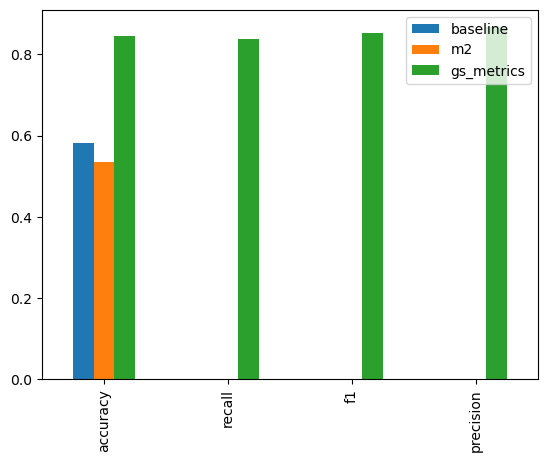

In [467]:
comapre_metrics.plot.bar();

In [468]:
# save and load a model 
import pickle 
pickle.dump(gs_clf,open("gs_random_forest_model_1","wb"))

In [469]:
loaded_model=pickle.load(open("gs_random_forest_model_1","rb"))

In [470]:
loaded_model.predict(X_test)

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])